## [Более продвинутые графики с Pandas/Matplotlib](https://geo-python-site.readthedocs.io/en/latest/notebooks/L7/advanced-plotting.html)

In [23]:
import os
import pandas as pd
import matplotlib.pyplot as plt

#### Данные
Данные метеонаблюдений из аэропорта Хельсинки-Вантаа [downloaded from NOAA](https://www7.ncdc.noaa.gov/CDO/cdopoemain.cmd?datasetabbv=DS3505&countryabbv=&georegionabbv=&resolution=40)

##### Загрузка данных:

In [2]:
# Текущая директория
ROOT_PATH = os.path.abspath(os.curdir)
# Подробная информация о погодных наблюдениях на каждой станции
fpa = os.path.join(ROOT_PATH,r'data\029740.txt')
# считывает данные, используя различное количество пробелов в качестве разделителя
# замена * на NaN, выберем только колонки 'YR--MODAHRMN', 'TEMP', 'MAX', 'MIN', 
""" 
parse_dates - принимает список имен столбцов Python, содержащий данные даты, которые панды будут анализировать 
и преобразовывать в тип данных datetime. Для многих распространенных форматов дат этот параметр 
автоматически распознает и преобразует данные даты.

index_col используется для указания столбца, который должен использоваться для индексации данных 
в фрейме данных. В этом случае мы получаем наши данные о дате в качестве индекса фрейма данных. 
Это очень полезная функция в панд, как мы увидим ниже.
"""
dfa = pd.read_csv(fpa, delim_whitespace=True, 
                 na_values=['*', '**', '***', '****', '*****', '******'],
                 usecols=['YR--MODAHRMN', 'TEMP', 'MAX', 'MIN'],
                 parse_dates=['YR--MODAHRMN'], index_col='YR--MODAHRMN'
                )
dfa.head()

,TEMP,MAX,MIN
YR--MODAHRMN,,,
1952-01-01 00:00:00,36.0,NaN,NaN
1952-01-01 06:00:00,37.0,NaN,34.0
1952-01-01 12:00:00,39.0,NaN,NaN
1952-01-01 18:00:00,36.0,39.0,NaN
1952-01-02 00:00:00,36.0,NaN,NaN


In [3]:
print(f"Количество строк: {len(dfa)}")

Количество строк: 931767


In [24]:
# переименуем колонку TEMP в TEMP_F (фарингейт)
new_names = {"TEMP":"TEMP_F"}
dfa = dfa.rename(columns=new_names)
dfa.head(5)

,TEMP_F,MAX,MIN,TEMP_C
YR--MODAHRMN,,,,
1952-01-01 00:00:00,36.0,NaN,NaN,2.222222
1952-01-01 06:00:00,37.0,NaN,34.0,2.777778
1952-01-01 12:00:00,39.0,NaN,NaN,3.888889
1952-01-01 18:00:00,36.0,39.0,NaN,2.222222
1952-01-02 00:00:00,36.0,NaN,NaN,2.222222


#### Подготовка данных
Проверим сколько данных отсутствует (NaN) 

In [25]:
print("Количество отсутствующих данных: ", dfa["TEMP_F"].isna().sum())

Количество отсутствующих данных:  0


In [26]:
# удалим строки с отсутствующими данными по колонке TEMP_F и сразу обновим выборку
dfa.dropna(subset=["TEMP_F"], inplace=True)
print("количество строк после удаления значений данных:", len(dfa))

количество строк после удаления значений данных: 928188


In [27]:
# перевод в цельсии
dfa["TEMP_C"] = (dfa["TEMP_F"] - 32.0) / 1.8
dfa.head()

,TEMP_F,MAX,MIN,TEMP_C
YR--MODAHRMN,,,,
1952-01-01 00:00:00,36.0,NaN,NaN,2.222222
1952-01-01 06:00:00,37.0,NaN,34.0,2.777778
1952-01-01 12:00:00,39.0,NaN,NaN,3.888889
1952-01-01 18:00:00,36.0,39.0,NaN,2.222222
1952-01-02 00:00:00,36.0,NaN,NaN,2.222222


#### Подграфики
Теперь давайте выберем данные из разных сезонов года в 2012/2013 годах:

- Зима (Декабрь 2012 - Февраль 2013)

- Весна (Март 2013 - Май 2013)

- Лето (Июнь 2013 - Август 2013)

- Осень (Сентябрь 2013 - Ноябрь 2013)


In [28]:
winter = dfa[(dfa.index >= '201212010000') & (dfa.index <= '201303010000')]
winter_temps = winter["TEMP_C"]
                                              
spring = dfa[(dfa.index >= '201303010000') & (dfa.index <= '201306010000')]
spring_temps = spring["TEMP_C"]
                                              
summer = dfa[(dfa.index >= '201306010000') & (dfa.index <= '201309010000')]
summer_temps = summer["TEMP_C"]
                                              
autumn = dfa[(dfa.index >= '201309010000') & (dfa.index <= '201312010000')] 
autumn_temps = autumn["TEMP_C"]

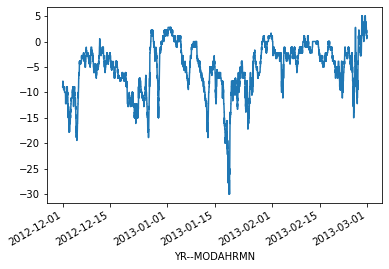

In [9]:
ax1 = winter_temps.plot()

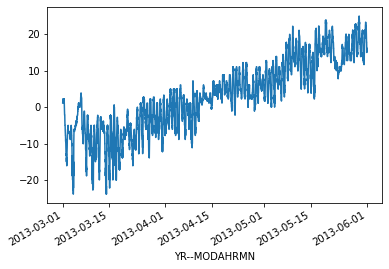

In [10]:
ax2 = spring_temps.plot()

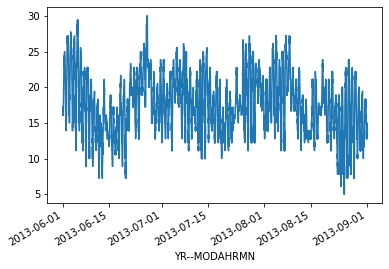

In [11]:
ax3 = summer_temps.plot()

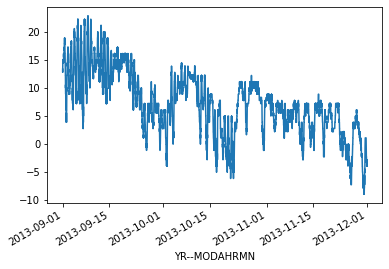

In [12]:
ax4 = autumn_temps.plot()

#### Установим единые граници для всех графиков

In [29]:
# Найти нижний предел для оси y
temp_min = min(winter_temps.min(), spring_temps.min(), summer_temps.min(), autumn_temps.min()) - 0.5
print(temp_min)

# найти верхний предел для оси y
temp_max = max(winter_temps.max(), spring_temps.max(), summer_temps.max(), autumn_temps.max()) + 0.5
print(temp_max)

-30.5
30.5


#### Создание подграфиков
Мы можем создать панель 2x2 для нашей визуализации с помощью функции Subplots() Matplotlib, где мы указываем, сколько строк и столбцов мы хотим иметь на нашем рисунке. Мы также можем указать размер нашей фигуры с помощью параметра figsize (), который принимает значения ширины и высоты (в дюймах) в качестве входных данных.

array([[<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>]], dtype=object)

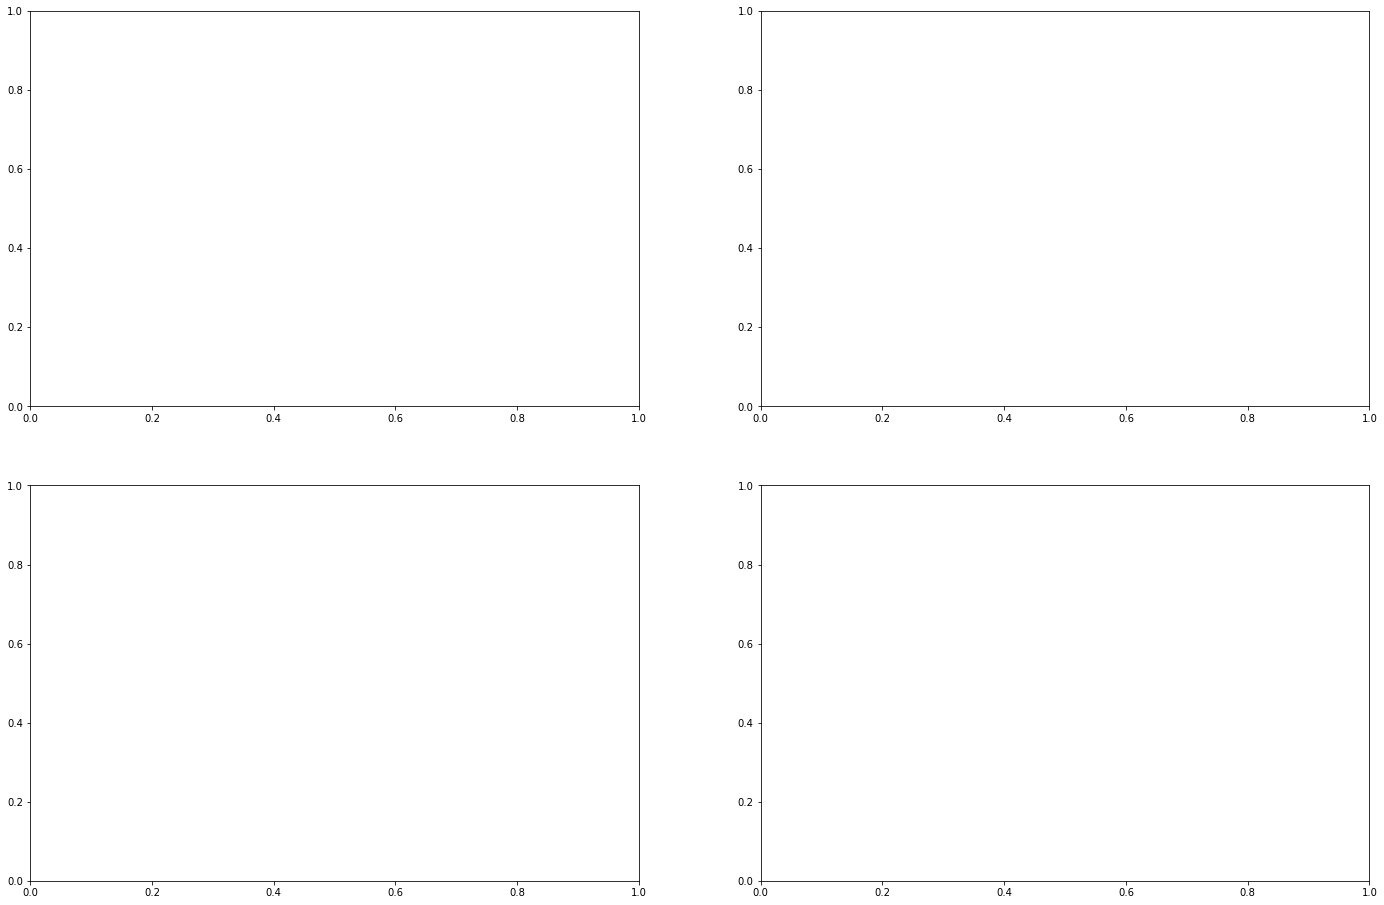

In [14]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(24,16))
axs

In [15]:
# help(plt.subplots)

In [16]:
ax11 = axs[0][0]
ax12 = axs[0][1]
ax21 = axs[1][0]
ax22 = axs[1][1]

Теперь у нас есть четыре различных осевых переменных для различных панелей на нашем рисунке. Затем мы можем использовать их для построения сезонных данных в них. Давайте сначала построим график сезонов и дадим разные цвета для линий, а также определим границы шкалы y, чтобы они были одинаковыми для всех подзаголовков.

- **c** - изменяет цвет линии.Вы можете найти обширный список возможных цветов и RGB-цветовых кодов по [этой ссылке](http://www.rapidtables.com/web/color/RGB_Color.htm).

- **lw** - ширина линии.

- **ylim** - диапазон по оси y

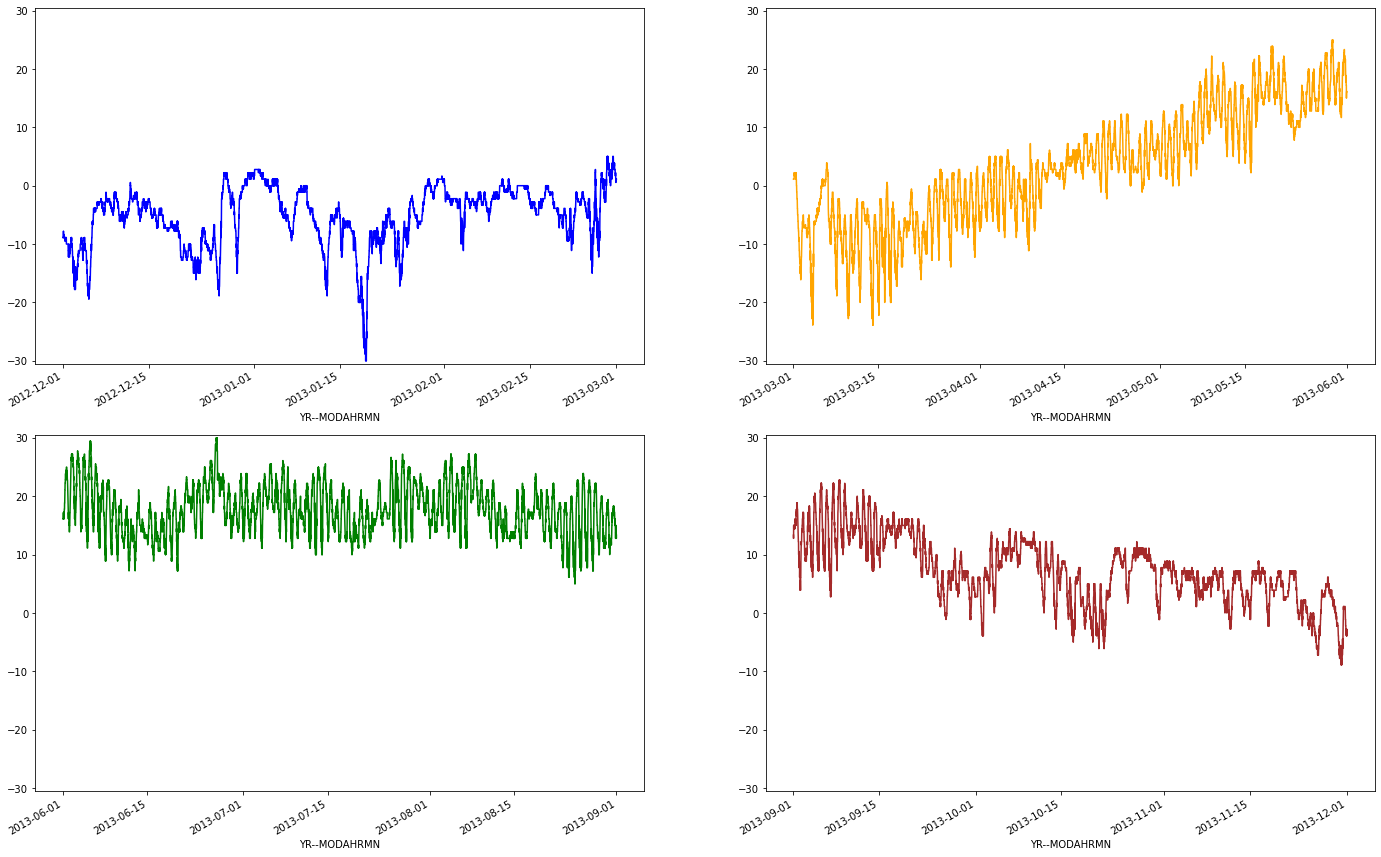

In [17]:
# ширина линии
line_width = 1.5

# графики по данным
winter_temps.plot(ax=ax11, c='blue', lw=line_width, ylim=[temp_min, temp_max])
spring_temps.plot(ax=ax12, c='orange', lw=line_width, ylim=[temp_min, temp_max])
summer_temps.plot(ax=ax21, c='green', lw=line_width, ylim=[temp_min, temp_max])
autumn_temps.plot(ax=ax22, c='brown', lw=line_width, ylim=[temp_min, temp_max])

# вывод на экран
fig

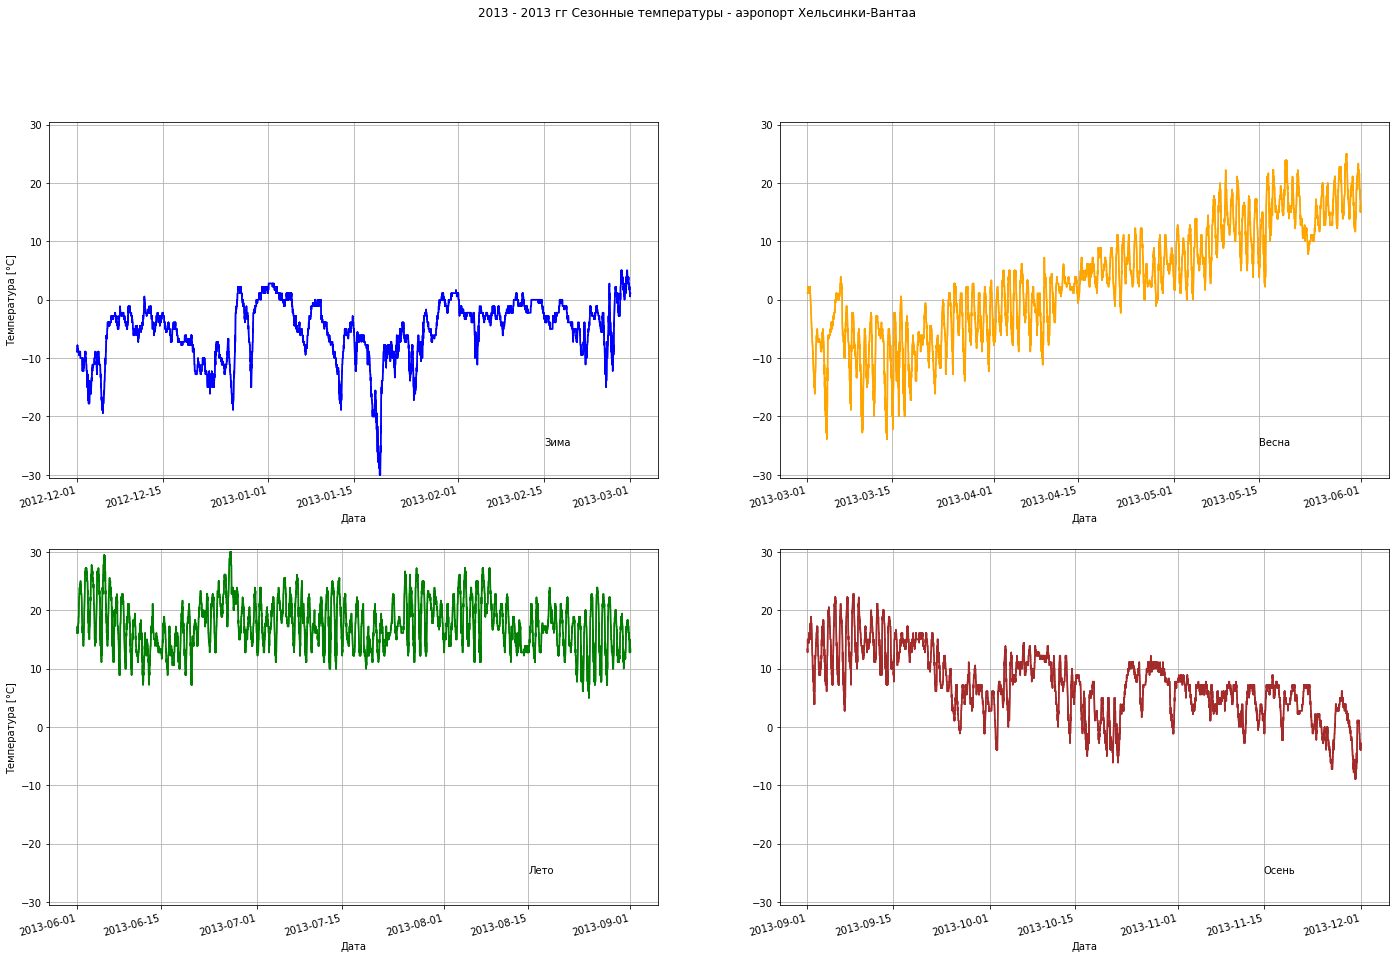

In [18]:
# ширина линии
line_width = 1.5

# графики по данным с сеткой
winter_temps.plot(ax=ax11, c='blue', lw=line_width, ylim=[temp_min, temp_max], grid=True)
spring_temps.plot(ax=ax12, c='orange', lw=line_width, ylim=[temp_min, temp_max], grid=True)
summer_temps.plot(ax=ax21, c='green', lw=line_width, ylim=[temp_min, temp_max], grid=True)
autumn_temps.plot(ax=ax22, c='brown', lw=line_width, ylim=[temp_min, temp_max], grid=True)

# название графиков
fig.suptitle("2013 - 2013 гг Сезонные температуры - аэропорт Хельсинки-Вантаа")

# поворот надписи по оси X на 15 град против часовой стрелки
plt.setp(ax11.xaxis.get_majorticklabels(), rotation=15)
plt.setp(ax12.xaxis.get_majorticklabels(), rotation=15)
plt.setp(ax21.xaxis.get_majorticklabels(), rotation=15)
plt.setp(ax22.xaxis.get_majorticklabels(), rotation=15)

# метки по осям
ax11.set_xlabel("Дата")
ax12.set_xlabel("Дата")
ax21.set_xlabel("Дата")
ax22.set_xlabel("Дата")
ax11.set_ylabel("Температура [°C]")
ax21.set_ylabel("Температура [°C]")

# метки на графике с названием сезона (pd.to_datetime('20130215') - метка по оси X; -25 - метка по оси Y)
ax11.text(pd.to_datetime('20130215'), -25, 'Зима')
ax12.text(pd.to_datetime('20130515'), -25, 'Весна')
ax21.text(pd.to_datetime('20130815'), -25, 'Лето')
ax22.text(pd.to_datetime('20131115'), -25, 'Осень')

# вывод на экран
# fig

#### Задача (проверка):
Визуализируйте зимние и летние температуры на панельном рисунке 1х2. Сохраните рисунок в формате .png.

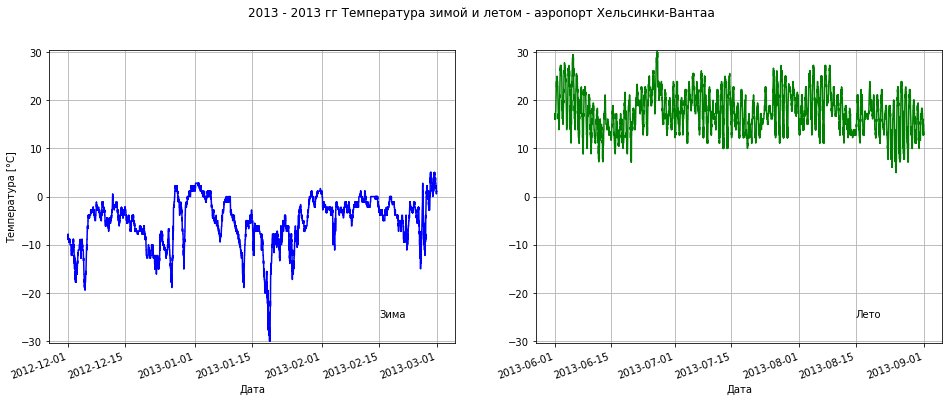

In [53]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16,6))
axs

ax1 = axs[0]
ax2 = axs[1]

# ширина линии
line_width = 1.5

# графики по данным
winter_temps.plot(ax=ax1, c='blue', lw=line_width, ylim=[temp_min, temp_max], grid=True)
summer_temps.plot(ax=ax2, c='green', lw=line_width, ylim=[temp_min, temp_max], grid=True)

# название графиков
fig.suptitle("2013 - 2013 гг Температура зимой и летом - аэропорт Хельсинки-Вантаа")

#
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=20)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=20)
#
ax1.set_ylabel("Температура [°C]")
ax1.set_xlabel("Дата") 
ax2.set_xlabel("Дата")

#
ax1.text(pd.to_datetime('20130215'), -25, "Зима")
ax2.text(pd.to_datetime('20130815'), -25, "Лето")

plt.savefig("img/HelsinkiVantaa_WinterSummer_2012-2013.png")